In [13]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.6 MB/s eta 0:00:00


In [1]:
import boto3
import botocore
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
s3 = boto3.client('s3')
s3_resource = boto3.resource('s3')

Matplotlib is building the font cache; this may take a moment.


In [2]:
def preview(bucket, key,sn=0,encode=None,skipr=None):
    data_source = {
            'Bucket': bucket,
            'Key': key
        }
    # Generate the URL to get Key from Bucket
    url = s3.generate_presigned_url(
        ClientMethod = 'get_object',
        Params = data_source
    )
    if ('csv' in key) :
        data = pd.read_csv(url, engine='pyarrow',encoding=encode,skiprows=skipr)
    elif ('xlsx' in key) :
        data = pd.read_excel(url,sheet_name=sn, engine='openpyxl',skiprows=skipr)
    elif ('XLS' in key) :
        data = pd.read_excel(url,sheet_name=sn, engine='xlrd',skiprows=skipr)
    return data

In [3]:
food_product=preview(bucket='bigdataprojectagri', key='row_data/Food_Production.csv')
food_product.columns = [['Food_product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying Per 1000kcal',
       'Eutrophying Per kilogram',
       'Eutrophying per 100g protein',
       'Freshwater withdrawals per 1000kcal',
       'Freshwater withdrawals per 100g protein',
       'Freshwater withdrawals per kilogram',
       'Greenhouse per 1000kcal',
       'Greenhouse gas emissions per 100g protein',
       'Land use per 1000kcal',
       'Land use per kilogram',
       'Land use per 100g protein',
       'Scarcity-weighted water use per kilogram',
       'Scarcity-weighted water use per 100g protein',
       'Scarcity-weighted water use per 1000kcal']]

food_product_2 = preview(bucket='bigdataprojectagri', key='row_data/food-footprints_2.csv')[['Entity','Emissions per kilogram']].to_numpy()
food_product_2 = pd.DataFrame(food_product_2.tolist(),columns=['Food_product','Total_emissions'])
food_product = food_product[['Food_product','Total_emissions']].to_numpy()
food_product = pd.DataFrame(food_product.tolist(),columns=['Food_product','Total_emissions'])
food_product_2 = food_product_2[food_product_2['Food_product']=='Coconut oil']
product = ['Groundnuts','Soybean Oil','Palm Oil','Sunflower Oil']
food_product = food_product[(food_product['Food_product']=='Groundnuts') | (food_product['Food_product']=='Soybean Oil') | 
             (food_product['Food_product']=='Palm Oil') | (food_product['Food_product']=='Sunflower Oil')]
food_product = food_product.append(food_product_2)
food_product = food_product.sort_values(['Total_emissions'],ascending=False).reset_index(drop=True)
food_product

/tmp/ipykernel_24971/3498298828.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  food_product = food_product.append(food_product_2)


,Food_product,Total_emissions
0,Palm Oil,7.600000
1,Soybean Oil,6.000000
2,Sunflower Oil,3.500000
3,Groundnuts,2.400000
4,Coconut oil,0.528741


/tmp/ipykernel_24971/3873619986.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(X, rotation=90)


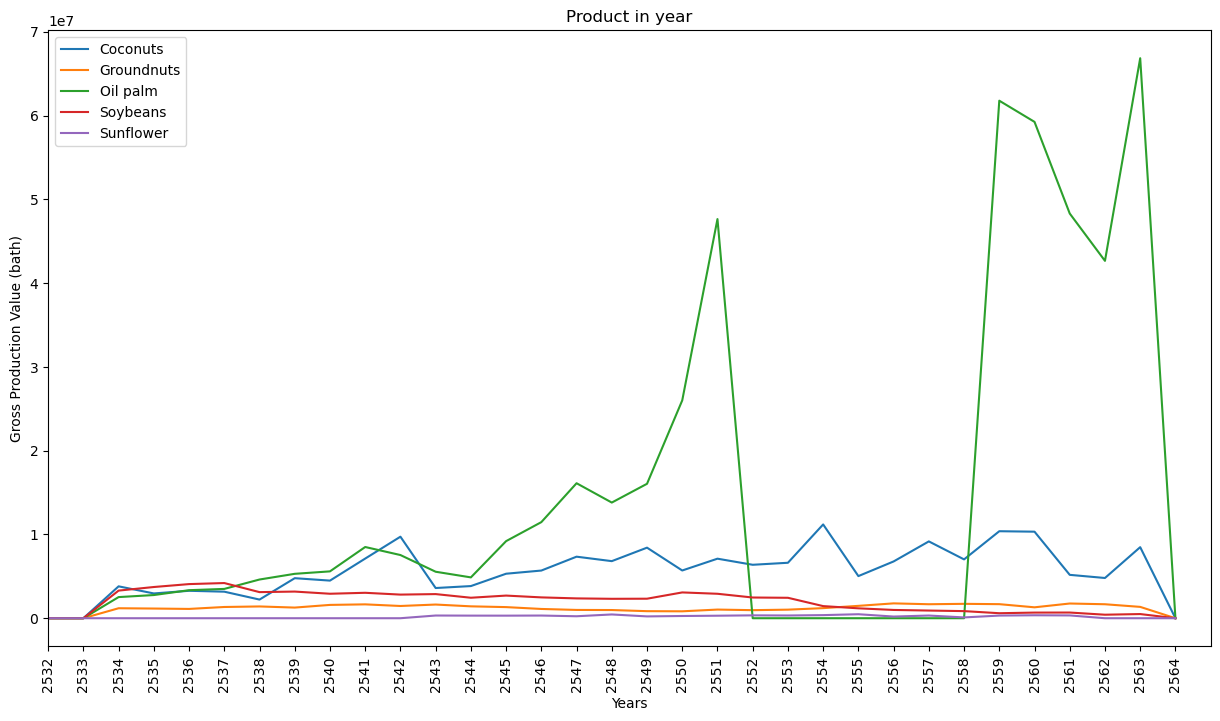

In [4]:
Production_Indices = preview(bucket='bigdataprojectagri', key=f'row_data/Value_of_Production_E_All_Data.csv',encode='utf-8')
Production_Indices = Production_Indices[Production_Indices['Area']==b'Thailand']
Production_Indices = Production_Indices[(Production_Indices['Item']==b'Coconuts, in shell') |
                                        (Production_Indices['Item']==b'Groundnuts, excluding shelled') |
                                        (Production_Indices['Item']==b'Oil palm fruit') | 
                                        (Production_Indices['Item']==b'Soya beans') |
                                        (Production_Indices['Item']==b'Sunflower seed')]
Production_Indices = Production_Indices[Production_Indices['Element']=='Gross Production Value (current thousand SLC)']
Production_Indices = Production_Indices.fillna(0)
columns_name = Production_Indices.columns.to_list()
my_columns = ['Item']
for i in range(0,len(columns_name)) :
    if columns_name[i][0] == 'Y' and columns_name[i][-1]!='F' :
        my_columns.append(columns_name[i])
Production_Indices = Production_Indices[my_columns].reset_index(drop=True)
my_columns = Production_Indices.columns.to_list()
for i in range(1,len(my_columns)) : 
    my_columns[i] = str(int(my_columns[i][1:])+543)
Production_Indices.columns = my_columns

X = Production_Indices.columns[1:]
fig, axes = plt.subplots(nrows=1,figsize=(15,8))
axes.plot(X,Production_Indices.iloc[0,1:])
axes.plot(X,Production_Indices.iloc[1,1:])
axes.plot(X,Production_Indices.iloc[2,1:])
axes.plot(X,Production_Indices.iloc[3,1:])
axes.plot(X,Production_Indices.iloc[4,1:])
axes.set_xticklabels(X, rotation=90)
axes.set_xlim(28,len(X))
axes.legend(labels =['Coconuts','Groundnuts','Oil palm','Soybeans','Sunflower'])
axes.set_title('Product in year')
axes.set_ylabel('Gross Production Value (bath)')
axes.set_xlabel('Years')
plt.show()

/tmp/ipykernel_24971/782452865.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  oil_TH.drop(['Entity', 'Code','sesame','Maize','Palm','safflower','rapeseed','Linseed','Olive','Cottonseed'], 1, inplace=True)
/tmp/ipykernel_24971/782452865.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  oil_TH.drop(['Entity', 'Code','sesame','Maize','Palm','safflower','rapeseed','Linseed','Olive','Cottonseed'], 1, inplace=True)


Text(0, 0.5, "Emission per kilogram's product")

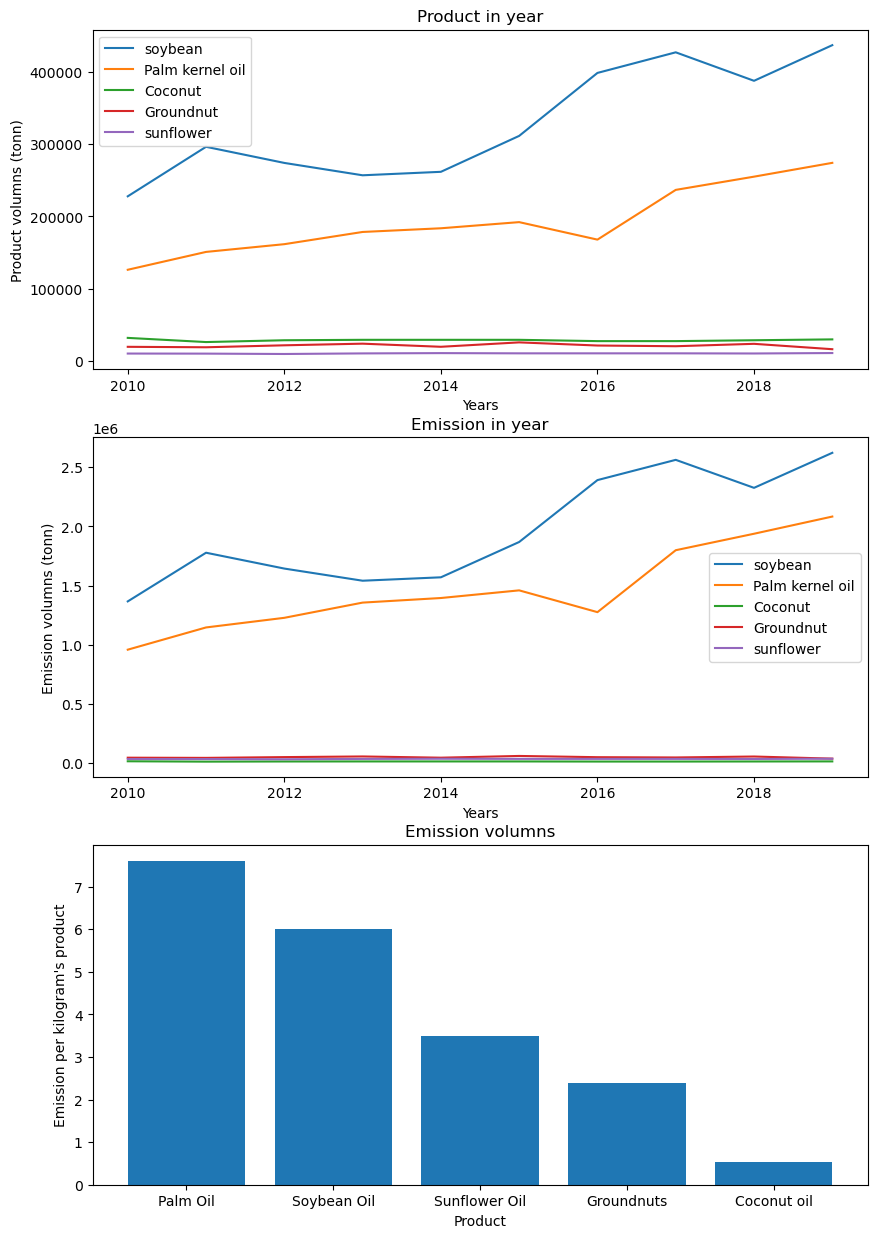

In [5]:
vegetable_oil = preview(bucket='bigdataprojectagri', key=f'row_data/vegetable-oil-production.csv')
oil_TH = vegetable_oil[vegetable_oil['Entity']=='Thailand'].sort_values(['Year']).reset_index(drop=True)
oil_TH.columns = [['Entity', 'Code', 'Year','sesame','Maize','safflower','Coconut','sunflower','rapeseed',
'Palm kernel oil','Groundnut','Linseed','Olive','Palm','soybean','Cottonseed']]
oil_TH.drop(['Entity', 'Code','sesame','Maize','Palm','safflower','rapeseed','Linseed','Olive','Cottonseed'], 1, inplace=True)
oil_TH.columns = ['Year','Coconut','sunflower','Palm kernel oil','Groundnut','soybean']
oil_TH = oil_TH[oil_TH['Year']>=2010].reset_index(drop=True)
oil_TH['soybean'] = oil_TH['soybean']*1000
oil_TH['Palm kernel oil'] = oil_TH['Palm kernel oil']*1000
oil_TH['Coconut'] = oil_TH['Coconut']*1000
oil_TH['Groundnut'] = oil_TH['Groundnut']*1000
oil_TH['sunflower'] = oil_TH['sunflower']*1000

X = oil_TH.Year.to_numpy()
fig, axes = plt.subplots(nrows=3,figsize=(10,15))
axes[0].plot(X,(oil_TH['soybean']/1000))
axes[0].plot(X,(oil_TH['Palm kernel oil']/1000))
axes[0].plot(X,(oil_TH['Coconut']/1000))
axes[0].plot(X,(oil_TH['Groundnut']/1000))
axes[0].plot(X,(oil_TH['sunflower']/1000))
axes[0].set_title('Product in year')
axes[0].set_ylabel('Product volumns (tonn)')
axes[0].set_xlabel('Years')
axes[0].legend(labels =['soybean','Palm kernel oil','Coconut','Groundnut','sunflower'])

axes[1].plot(X,(oil_TH['soybean']/1000)*food_product[food_product['Food_product']=='Soybean Oil']['Total_emissions'].to_list()[0])
axes[1].plot(X,(oil_TH['Palm kernel oil']/1000)*food_product[food_product['Food_product']=='Palm Oil']['Total_emissions'].to_list()[0])
axes[1].plot(X,(oil_TH['Coconut']/1000)*food_product[food_product['Food_product']=='Coconut oil']['Total_emissions'].to_list()[0])
axes[1].plot(X,(oil_TH['Groundnut']/1000)*food_product[food_product['Food_product']=='Groundnuts']['Total_emissions'].to_list()[0])
axes[1].plot(X,(oil_TH['sunflower']/1000)*food_product[food_product['Food_product']=='Sunflower Oil']['Total_emissions'].to_list()[0])
axes[1].set_title('Emission in year')
axes[1].set_ylabel('Emission volumns (tonn)')
axes[1].set_xlabel('Years')
axes[1].legend(labels =['soybean','Palm kernel oil','Coconut','Groundnut','sunflower'])

axes[2].bar(food_product['Food_product'],food_product['Total_emissions'])
axes[2].set_title('Emission volumns')
axes[2].set_xlabel('Product')
axes[2].set_ylabel("Emission per kilogram's product")

In [6]:
province = preview(bucket='bigdataprojectagri', key=f'row_data/ThepExcel-Thailand-Tambon.xlsx',sn='ProvinceDatabase')
provinceEng = province['ProvinceEng'].to_list()
province = province['ProvinceThai'].to_list()
map_Province = []
for i in range(len(province)) :
    map_Province.append([province[i],provinceEng[i]])
dict_Province = {provinceTH:ProvinceEng for provinceTH, ProvinceEng in map_Province}
dict_Province['อยุธยา'] = 'Phra Nakhon Si Ayutthaya'
dict_Province['ลําพูน'] = 'Lamphun'
dict_Province['ลําปาง'] = 'Lampang'
provinceEng.append('Phra Nakhon Si Ayutthaya')
provinceEng.append('Lamphun')
provinceEng.append('Lampang')
All_product = preview(bucket='bigdataprojectagri', key=f'row_data/product.xlsx').to_numpy()
All_product = pd.DataFrame(All_product,columns=['province','area(rai)','product(kg.)'])
All_product = All_product.iloc[:-2].reset_index(drop=True)
All_product['province'] = All_product['province'].replace(dict_Province)
prov_Sunflower = []
prod_Sunflower = []
area_Sunflower = []
ratio_Sunflower = []
Yield_per_Sunflower = []

prov_Groundnuts = []
prod_Groundnuts = []
area_Groundnuts = []
ratio_Groundnuts = []
Yield_per_Groundnuts = []

Palm_oil = preview(bucket='bigdataprojectagri', key=f'row_data/palm_oil.xlsx',skipr=2)

Soybean = preview(bucket='bigdataprojectagri', key=f'row_data/soybeans.xlsx',skipr=2)

Coconut = preview(bucket='bigdataprojectagri', key=f'row_data/coconut.xlsx',skipr=2)

for i in range(len(All_product)) :
    if All_product['province'].iloc[i] in provinceEng :
        if All_product['province'].iloc[i] in prov_Sunflower :
            continue
        prov_Sunflower.append(All_product['province'].iloc[i])
        prod_Sunflower.append(0)
        area_Sunflower.append(0)
    if(All_product['province'].iloc[i] == 'ทานตะวัน') :
        prod_Sunflower[len(prov_Sunflower)-1]+=All_product['product(kg.)'].iloc[i]
        area_Sunflower[len(prov_Sunflower)-1]+=All_product['area(rai)'].iloc[i]
        
for i in range(len(All_product)) :
    #print(All_product['province'].iloc[i])
    if All_product['province'].iloc[i] in provinceEng :
        if All_product['province'].iloc[i] in prov_Groundnuts :
            continue
       # print(prov_Groundnuts)
#         print('----------------------')
#         print(All_product['province'].iloc[i])
        prov_Groundnuts.append(All_product['province'].iloc[i])
        prod_Groundnuts.append(0)
        area_Groundnuts.append(0)
    if(All_product['province'].iloc[i] == 'ถั่วลิสง') :
#         print(i,' ',All_product['product(kg.)'].iloc[i],' ',All_product['area(rai)'].iloc[i])
        prod_Groundnuts[len(prod_Groundnuts)-1]+=All_product['product(kg.)'].iloc[i]
        area_Groundnuts[len(area_Groundnuts)-1]+=All_product['area(rai)'].iloc[i]


Sunflower = pd.DataFrame({
    'province':prov_Sunflower,
    'Yield(kg)':prod_Sunflower,
    'Harvested area (rai)':area_Sunflower})
Sunflower = Sunflower[(Sunflower['Yield(kg)']!=0)].sort_values(['Yield(kg)'],ascending=False).reset_index(drop=True)
Sunflower['ratio'] = Sunflower['Yield(kg)']/sum(Sunflower['Yield(kg)'])
Sunflower['Yield per harvested area (kg.)'] = Sunflower['Yield(kg)']/Sunflower['Harvested area (rai)']

Groundnuts = pd.DataFrame({
    'province':prov_Groundnuts,
    'Yield(kg)':prod_Groundnuts,
    'Harvested area (rai)':area_Groundnuts})
Groundnuts = Groundnuts[(Groundnuts['Yield(kg)']!=0)].sort_values(['Yield(kg)'],ascending=False).reset_index(drop=True)
Groundnuts['ratio'] = Groundnuts['Yield(kg)']/sum(Groundnuts['Yield(kg)'])
Groundnuts['Yield per harvested area (kg.)'] = Groundnuts['Yield(kg)']/Groundnuts['Harvested area (rai)']

Palm_oil.columns = ['province', 'Yield(kg)', 'ratio', 'Harvested area (rai)','Yield per harvested area (kg.)']
for i in range(len(Palm_oil)) :
    Palm_oil['Yield(kg)'].iloc[i] = Palm_oil['Yield(kg)'].iloc[i]*1000
Soybean.columns = ['province', 'Yield(kg)', 'ratio', 'Harvested area (rai)','Yield per harvested area (kg.)']
for i in range(len(Soybean)) :
    Soybean['Yield(kg)'].iloc[i] = Soybean['Yield(kg)'].iloc[i]*1000
Coconut.columns= ['province', 'Yield(kg)', 'ratio', 'Harvested area (rai)','Yield per harvested area (kg.)']
for i in range(len(Coconut)) :
    Coconut['Yield(kg)'].iloc[i] = Coconut['Yield(kg)'].iloc[i]*1000
Groundnuts['province'] = Groundnuts['province'].replace(dict_Province)
Soybean['province'] = Soybean['province'].replace(dict_Province)
Coconut['province'] = Coconut['province'].replace(dict_Province)
Palm_oil['province'] = Palm_oil['province'].replace(dict_Province)
Sunflower['province'] = Sunflower['province'].replace(dict_Province)
# Groundnuts.to_excel('Clean/Groundnuts.xlsx',index=False)
# Soybean.to_excel('Clean/Soybean.xlsx',index=False)
# Coconut.to_excel('Clean/Coconut.xlsx',index=False)
# Palm_oil.to_excel('Clean/Palm_oil.xlsx',index=False)
# Sunflower.to_excel('Clean/Sunflower.xlsx',index=False)

/tmp/ipykernel_24971/147005664.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Palm_oil['Yield(kg)'].iloc[i] = Palm_oil['Yield(kg)'].iloc[i]*1000
/tmp/ipykernel_24971/147005664.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Soybean['Yield(kg)'].iloc[i] = Soybean['Yield(kg)'].iloc[i]*1000
/tmp/ipykernel_24971/147005664.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coconut['Yield(kg)'].iloc[i] = Coconut['Yield(kg)'].ilo

/tmp/ipykernel_24971/859362693.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(eff_Palm_oil['province'].iloc[0:10], rotation=90)


,province,Yield(kg),ratio,Harvested area (rai),Yield per harvested area (kg.)
0,Surat Thani,4048543000,0.2410,1219808,3319.00
1,Krabi,3710589000,0.2209,1118321,3318.00
2,Chumphon,3237336000,0.1927,987595,3278.00
3,Pathum Thani,21405000,0.0013,6546,3269.94
4,Nakhon Si Thammarat,1669664000,0.0994,535492,3118.00
...,...,...,...,...,...
64,Chai Nat,594000,0.0000,812,731.53
65,Nong Bua Lam Phu,3027000,0.0002,4343,696.98
66,Nan,2561000,0.0002,3868,662.10
67,Khon Kaen,874000,0.0001,1454,601.10


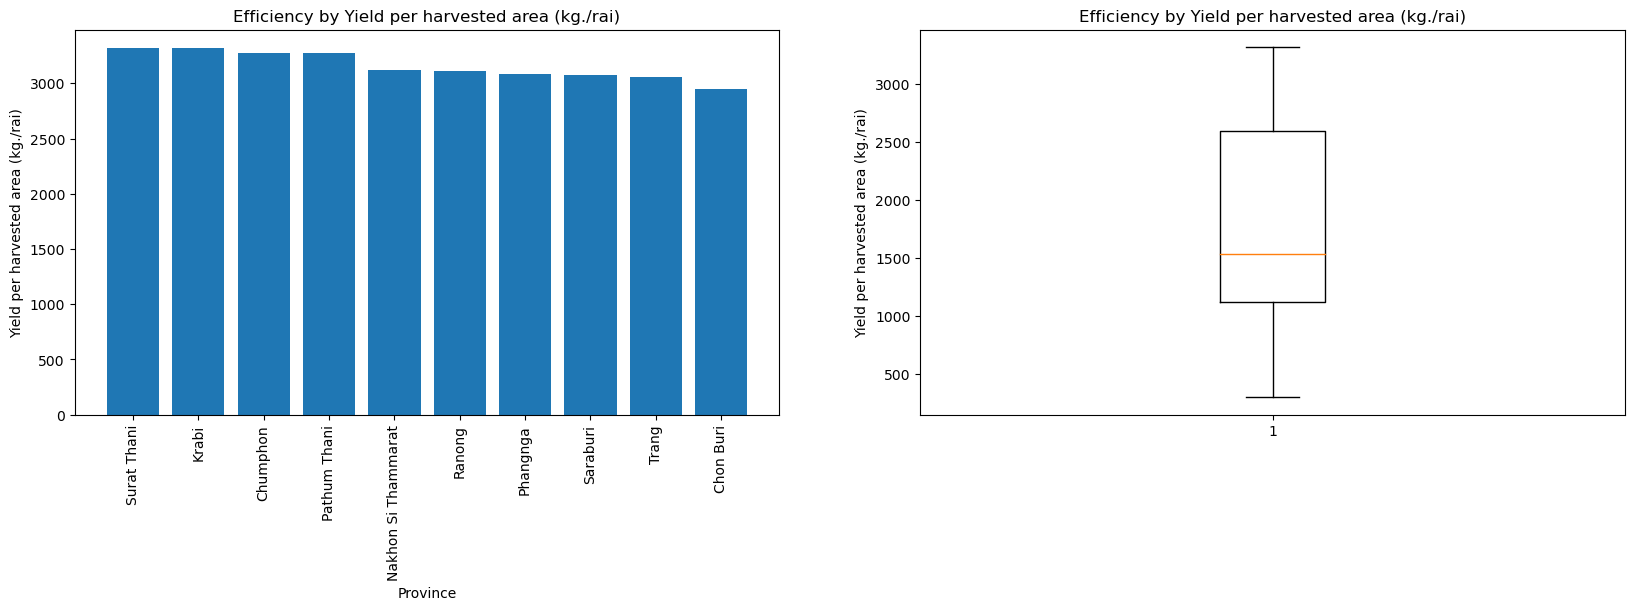

In [7]:
eff_Palm_oil = Palm_oil.sort_values(['Yield per harvested area (kg.)'],ascending=False).reset_index(drop=True)
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
axes[0].bar(eff_Palm_oil['province'].iloc[0:10],eff_Palm_oil['Yield per harvested area (kg.)'].iloc[0:10])
axes[0].set_xticklabels(eff_Palm_oil['province'].iloc[0:10], rotation=90)
axes[0].set_title('Efficiency by Yield per harvested area (kg./rai)')
axes[0].set_xlabel('Province')
axes[0].set_ylabel('Yield per harvested area (kg./rai)')

axes[1].boxplot(eff_Palm_oil['Yield per harvested area (kg.)'])
axes[1].set_title('Efficiency by Yield per harvested area (kg./rai)')
axes[1].set_ylabel('Yield per harvested area (kg./rai)')
eff_Palm_oil

/tmp/ipykernel_24971/3199530721.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(eff_Coconut['province'].iloc[0:10], rotation=90)


Text(0, 0.5, 'Yield per harvested area (kg./rai)')

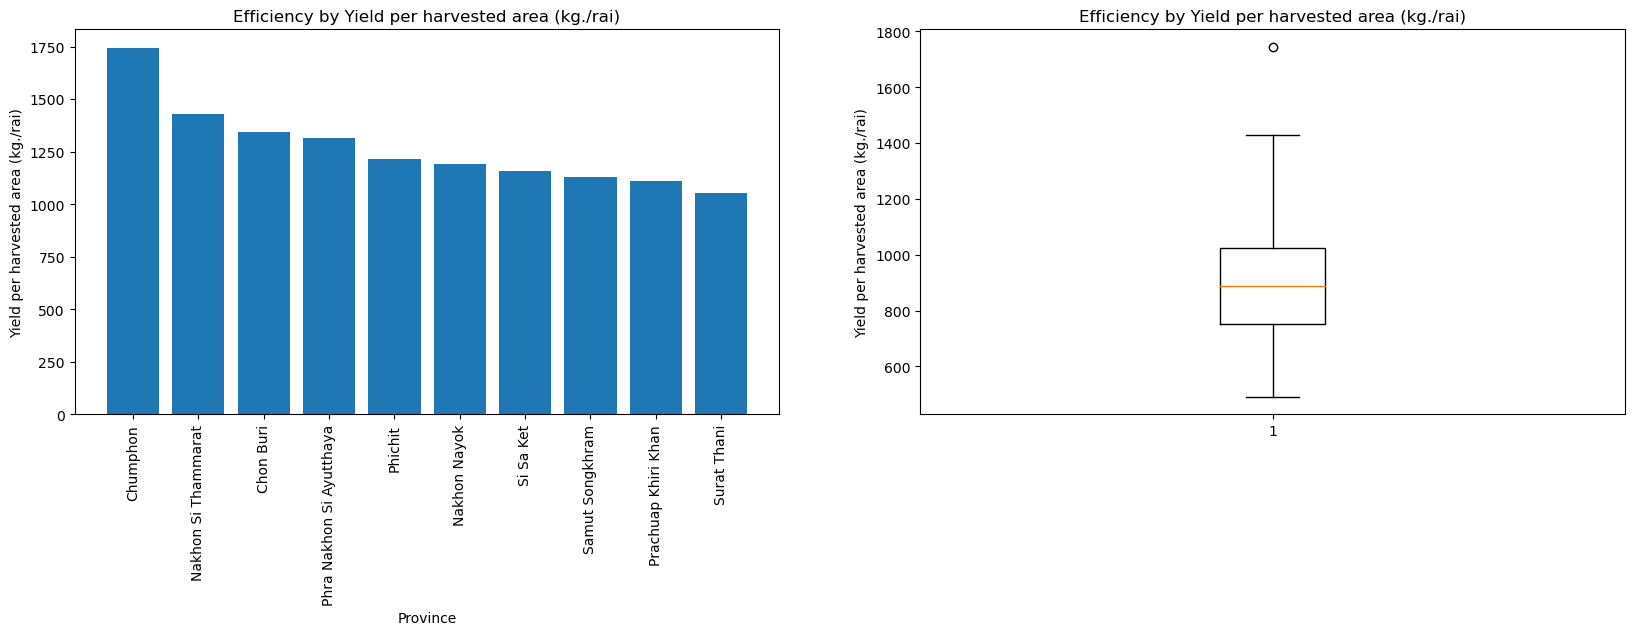

In [8]:
eff_Coconut = Coconut.sort_values(['Yield per harvested area (kg.)'],ascending=False).reset_index(drop=True)
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
axes[0].bar(eff_Coconut['province'].iloc[0:10],eff_Coconut['Yield per harvested area (kg.)'].iloc[0:10])
axes[0].set_xticklabels(eff_Coconut['province'].iloc[0:10], rotation=90)
axes[0].set_title('Efficiency by Yield per harvested area (kg./rai)')
axes[0].set_xlabel('Province')
axes[0].set_ylabel('Yield per harvested area (kg./rai)')

axes[1].boxplot(eff_Coconut['Yield per harvested area (kg.)'])
axes[1].set_title('Efficiency by Yield per harvested area (kg./rai)')
axes[1].set_ylabel('Yield per harvested area (kg./rai)')


/tmp/ipykernel_24971/1192654339.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(eff_Groundnuts['province'].iloc[0:10], rotation=90)


,Yield(kg),Harvested area (rai),ratio,Yield per harvested area (kg.)
count,4.800000e+01,48.000000,48.000000,48.000000
mean,1.253650e+05,748.369792,0.020833,297.801999
std,1.862078e+05,1059.309774,0.030944,319.300845
min,2.000000e+02,9.000000,0.000033,0.140820
25%,1.210500e+04,108.250000,0.002012,62.411051
50%,5.657750e+04,262.500000,0.009402,179.754637
75%,1.770475e+05,984.687500,0.029422,373.835492
max,1.085850e+06,5135.250000,0.180448,1054.385246


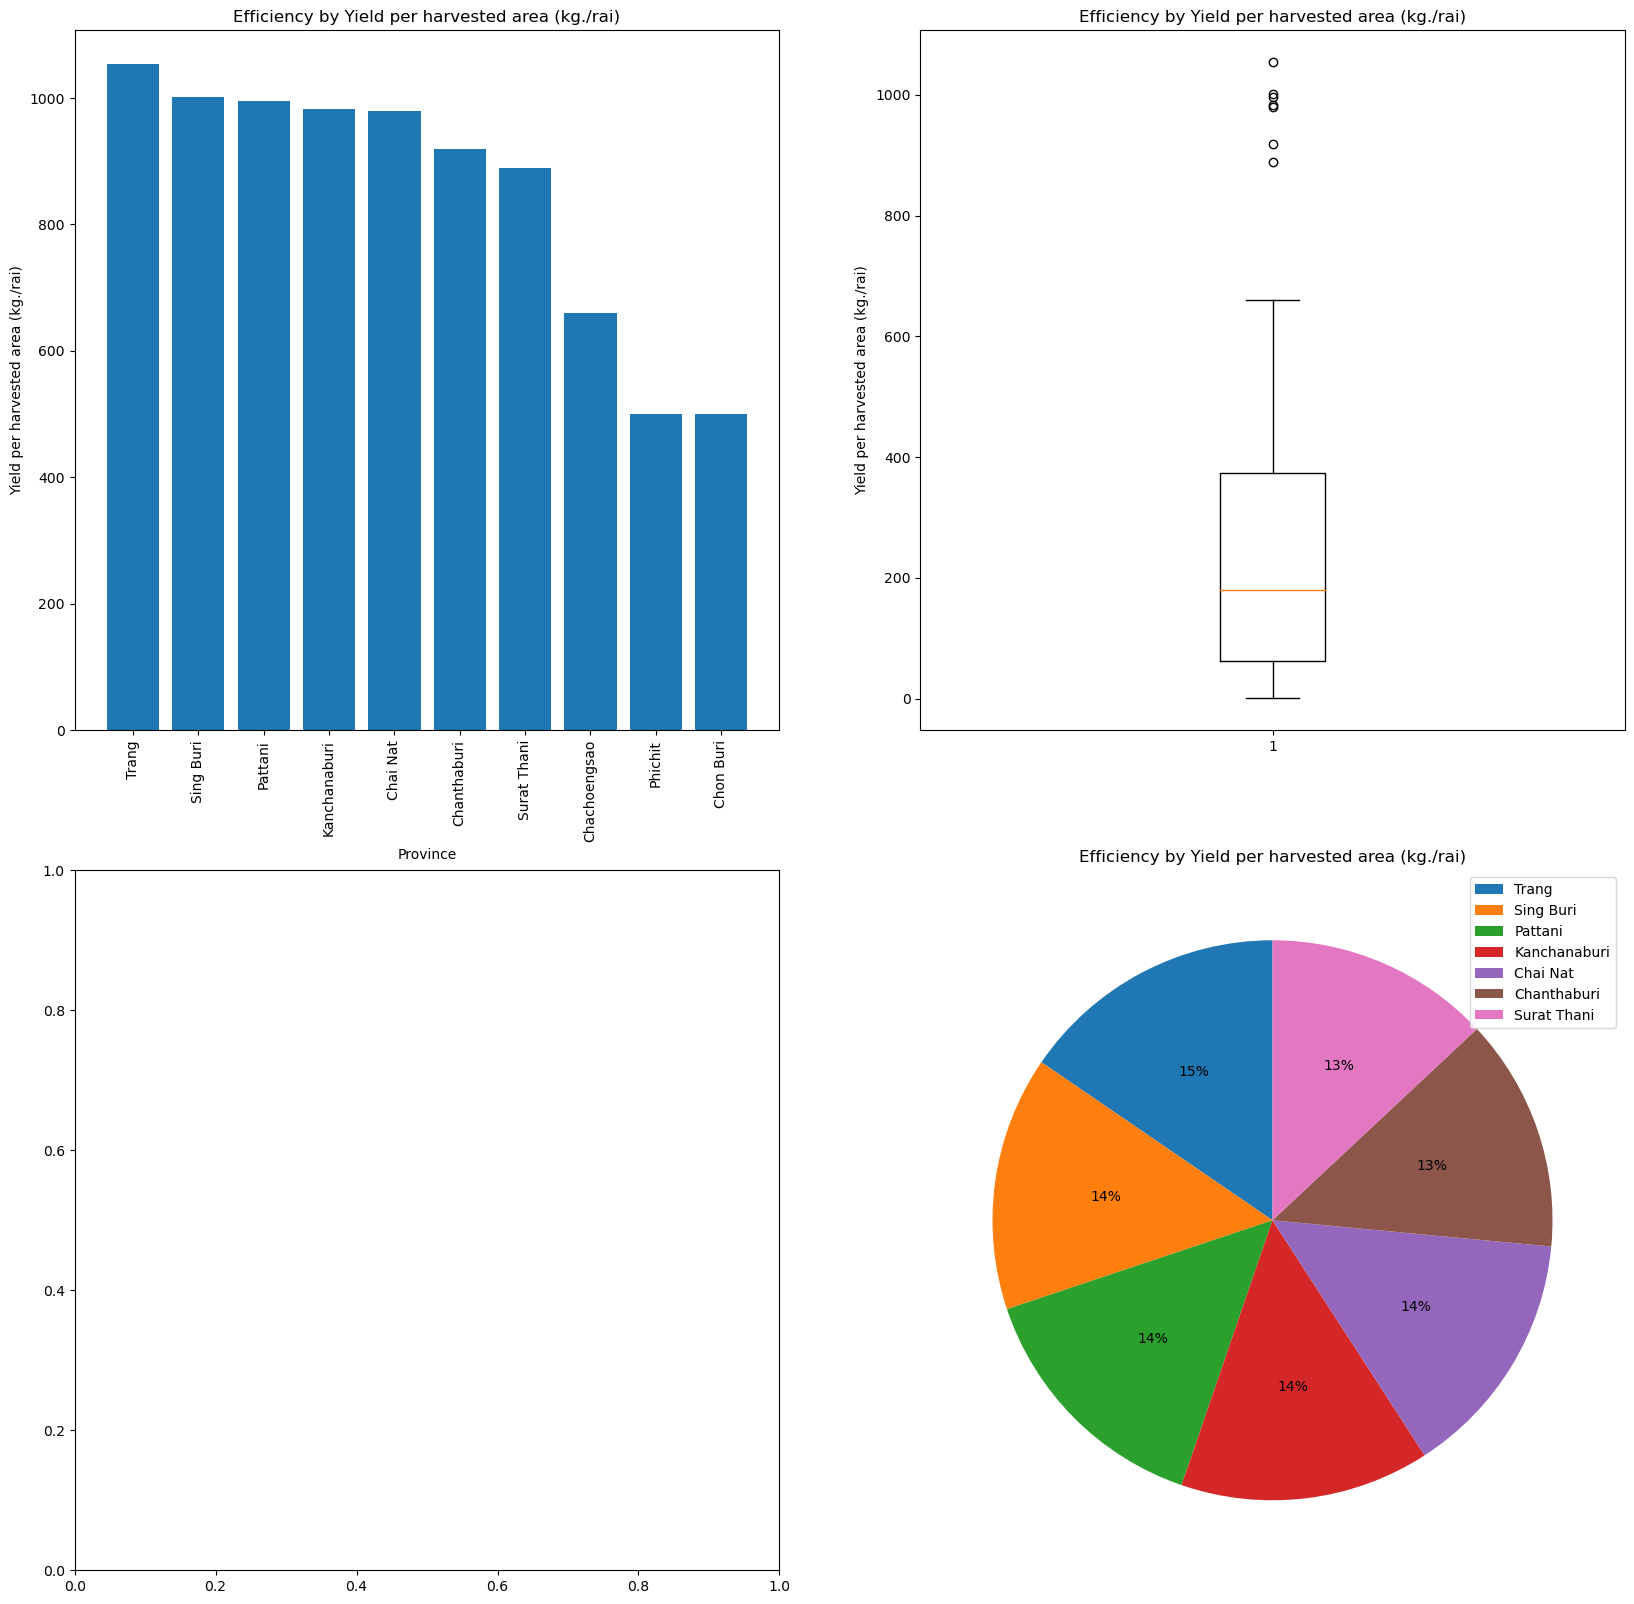

In [9]:
eff_Groundnuts = Groundnuts.sort_values(['Yield per harvested area (kg.)'],ascending=False).reset_index(drop=True)
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(20,20))
axes[0,0].bar(eff_Groundnuts['province'].iloc[0:10],eff_Groundnuts['Yield per harvested area (kg.)'].iloc[0:10])
axes[0,0].set_xticklabels(eff_Groundnuts['province'].iloc[0:10], rotation=90)
axes[0,0].set_title('Efficiency by Yield per harvested area (kg./rai)')
axes[0,0].set_xlabel('Province')
axes[0,0].set_ylabel('Yield per harvested area (kg./rai)')

axes[0,1].boxplot(eff_Groundnuts['Yield per harvested area (kg.)'])
axes[0,1].set_title('Efficiency by Yield per harvested area (kg./rai)')
axes[0,1].set_ylabel('Yield per harvested area (kg./rai)')

axes[1,1].pie(eff_Groundnuts['Yield per harvested area (kg.)'].iloc[0:7],
         autopct='%d%%',startangle=90)
axes[1,1].set_title('Efficiency by Yield per harvested area (kg./rai)')
axes[1,1].legend(labels =eff_Groundnuts['province'].iloc[0:7])
eff_Groundnuts.describe()

,Yield(kg),ratio,Harvested area (rai),Yield per harvested area (kg.)
count,4.000000e+00,4.000000,4.000000,4.000000
mean,5.377500e+05,0.250000,3160.250000,226.750000
std,5.187963e+05,0.241188,2671.822521,24.267605
min,2.360000e+05,0.109716,72.000000,193.000000
25%,2.465000e+05,0.114598,1386.750000,219.250000
50%,3.015000e+05,0.140167,3401.000000,232.000000
75%,5.927500e+05,0.275570,5174.500000,239.500000
max,1.312000e+06,0.609949,5767.000000,250.000000


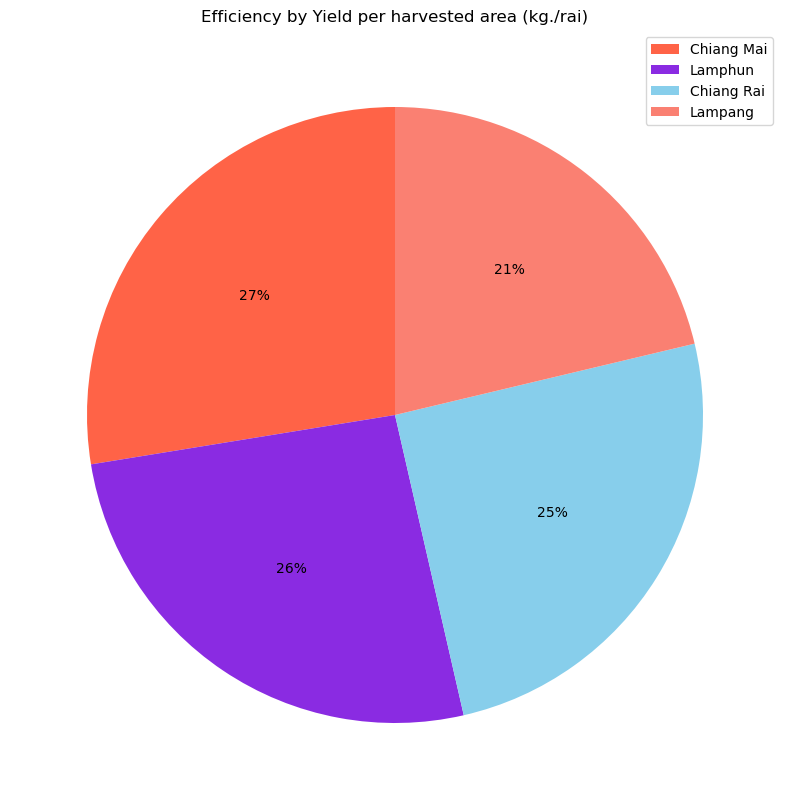

In [10]:
eff_Soybean = Soybean.sort_values(['Yield per harvested area (kg.)'],ascending=False).reset_index(drop=True)

# axes[0].bar(eff_Soybean['province'],eff_Soybean['Yield per harvested area (kg.)'])
# axes[0].set_xticklabels(eff_Coconut['province'], rotation=90)
# axes[0].set_title('Efficiency by Yield per harvested area (kg./rai)')
# axes[0].set_xlabel('Province')
# axes[0].set_ylabel('Yield per harvested area (kg./rai)')
fig, axes = plt.subplots(figsize=(10,10))
axes.pie(eff_Soybean['Yield per harvested area (kg.)'],colors=["tomato","blueviolet",'skyblue','salmon'],
         autopct='%d%%',startangle=90)
axes.set_title('Efficiency by Yield per harvested area (kg./rai)')
axes.legend(labels =eff_Soybean['province'])
eff_Soybean.describe()

,province,Yield(kg),Harvested area (rai),ratio,Yield per harvested area (kg.)
0,Nakhon Ratchasima,4500.0,15.00,0.002762,300.000000
1,Lop Buri,638910.0,3108.00,0.392199,205.569498
2,Surin,400.0,2.00,0.000246,200.000000
3,Nakhon Sawan,982887.5,5671.00,0.603351,173.318198
4,Saraburi,2350.0,46.75,0.001443,50.267380


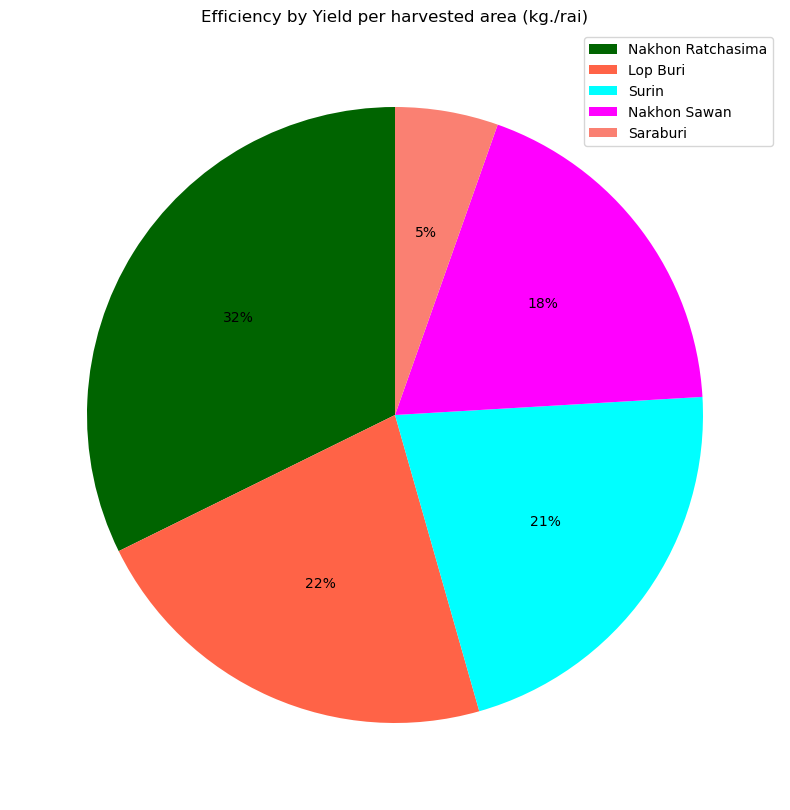

In [11]:
eff_Sunflower = Sunflower.sort_values(['Yield per harvested area (kg.)'],ascending=False).reset_index(drop=True)
fig, axes = plt.subplots(figsize=(10,10))
axes.pie(eff_Sunflower['Yield per harvested area (kg.)'],
         colors=["darkgreen","tomato","aqua",'magenta','salmon'],
         autopct='%d%%',startangle=90)
axes.set_title('Efficiency by Yield per harvested area (kg./rai)')
axes.legend(labels =eff_Sunflower['province'])
eff_Sunflower

In [14]:
all_Price = preview(bucket='bigdataprojectagri', key=f'row_data/Table3_th_agriPrice_01_66.XLS',skipr=2).iloc[33:37].T.reset_index(drop=False).iloc[2:]

all_Price = all_Price.reset_index(drop=True).to_numpy()
all_Price = pd.DataFrame(all_Price,columns=['year','palm oil(bath/kg)','coconut(bath/100)','soybean(bath/kg)','groundnuts(bath/kg)'])

price_palm = all_Price[['year','palm oil(bath/kg)']]
price_coconut = all_Price[['year','coconut(bath/100)']]
price_soybean = all_Price[['year','soybean(bath/kg)']]
price_groundnuts = all_Price[['year','groundnuts(bath/kg)']]

price_palm['palm oil(bath/kg)'] = price_palm['palm oil(bath/kg)'].astype('float64')
price_coconut['coconut(bath/100)'] =  price_coconut['coconut(bath/100)'].astype('float64')
price_groundnuts['groundnuts(bath/kg)'] = price_groundnuts['groundnuts(bath/kg)'].astype('float64')
price_soybean['soybean(bath/kg)'] = price_soybean['soybean(bath/kg)'].astype('float64')

# price_palm.to_excel('Clean/price_palm.xlsx',index=False)
# price_coconut.to_excel('Clean/price_coconut.xlsx',index=False)
# price_groundnuts.to_excel('Clean/price_groundnuts.xlsx',index=False)
# price_soybean.to_excel('Clean/price_soybean.xlsx',index=False)

/tmp/ipykernel_24971/2107835533.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_palm['palm oil(bath/kg)'] = price_palm['palm oil(bath/kg)'].astype('float64')
/tmp/ipykernel_24971/2107835533.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_coconut['coconut(bath/100)'] =  price_coconut['coconut(bath/100)'].astype('float64')
/tmp/ipykernel_24971/2107835533.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

/tmp/ipykernel_24971/3928194339.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x,rotation=90)


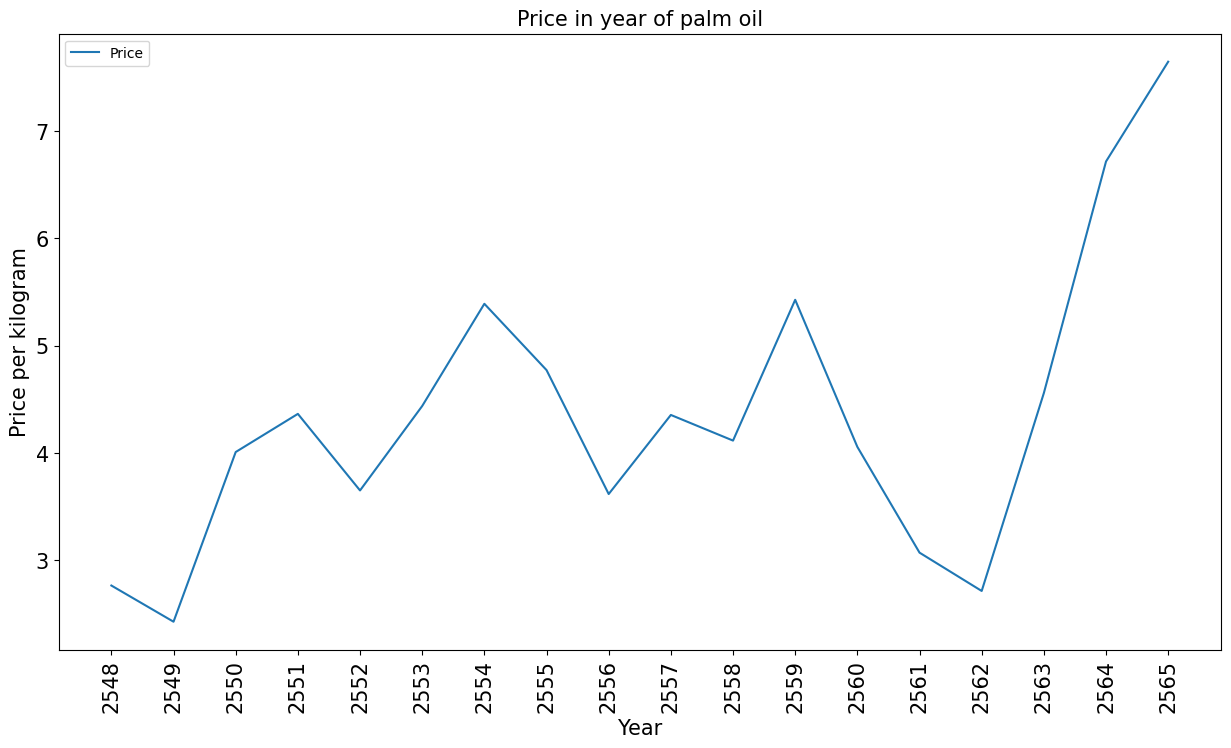

In [15]:
x=[str(x) for x in range(2548,2565+10)]
fig, axes = plt.subplots(figsize=(15,8))
axes.plot(x[0:len(price_palm)],price_palm['palm oil(bath/kg)'])
axes.set_xticklabels(x,rotation=90)
axes.set_title('Price in year of palm oil',size=15)
axes.set_ylabel('Price per kilogram',size=15)
axes.set_xlabel('Year',size=15)
axes.legend(['Price','Prediction'])
for label in (axes.get_xticklabels() + axes.get_yticklabels()):
    label.set_fontsize(15)

/tmp/ipykernel_24971/432169178.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x,rotation=90)


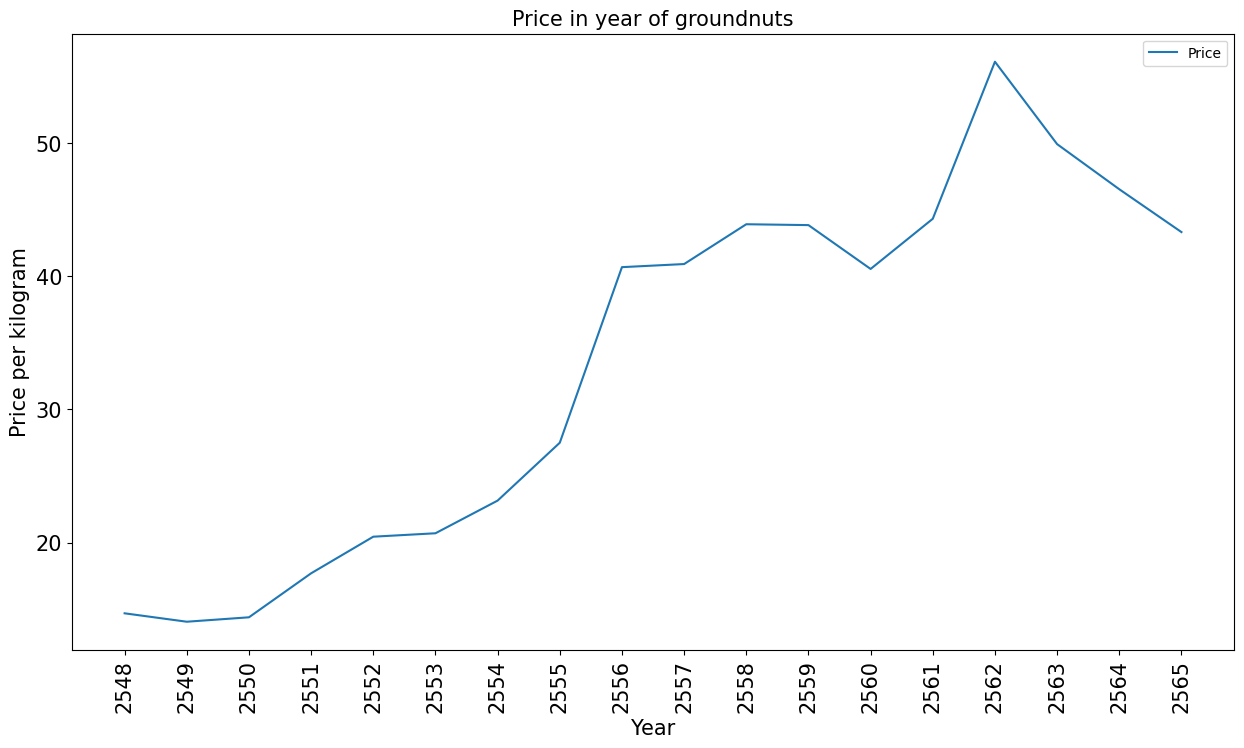

In [16]:
x=[str(x) for x in range(2548,2565+10)]
fig, axes = plt.subplots(figsize=(15,8))
axes.plot(x[0:len(price_groundnuts)],price_groundnuts['groundnuts(bath/kg)'])
axes.set_xticklabels(x,rotation=90)
axes.set_title('Price in year of groundnuts',size=15)
axes.set_ylabel('Price per kilogram',size=15)
axes.set_xlabel('Year',size=15)
axes.legend(['Price','Prediction'])
for label in (axes.get_xticklabels() + axes.get_yticklabels()):
    label.set_fontsize(15)

/tmp/ipykernel_24971/3086561436.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x,rotation=90)


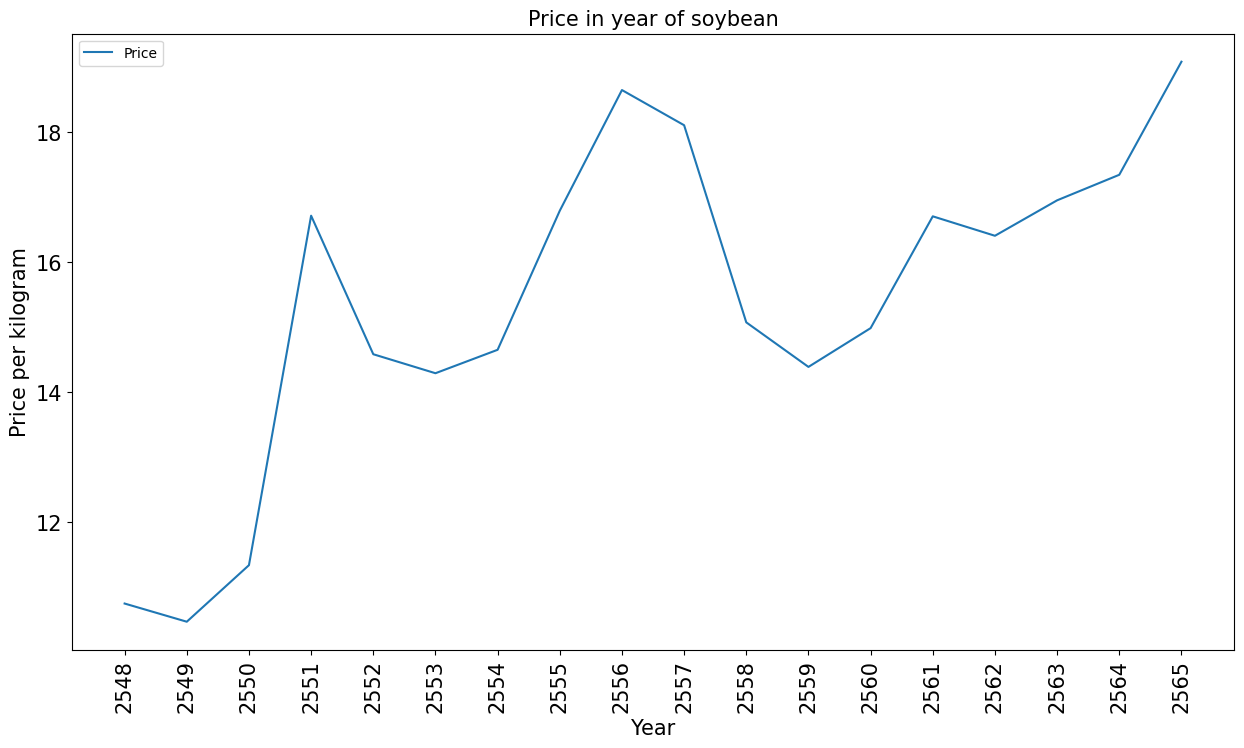

In [17]:
x=[str(x) for x in range(2548,2565+10)]
fig, axes = plt.subplots(figsize=(15,8))
axes.plot(x[0:len(price_soybean)],price_soybean['soybean(bath/kg)'])
axes.set_xticklabels(x,rotation=90)
axes.set_title('Price in year of soybean',size=15)
axes.set_ylabel('Price per kilogram',size=15)
axes.set_xlabel('Year',size=15)
axes.legend(['Price','Prediction'])
for label in (axes.get_xticklabels() + axes.get_yticklabels()):
    label.set_fontsize(15)

/tmp/ipykernel_24971/3272330671.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x,rotation=90)


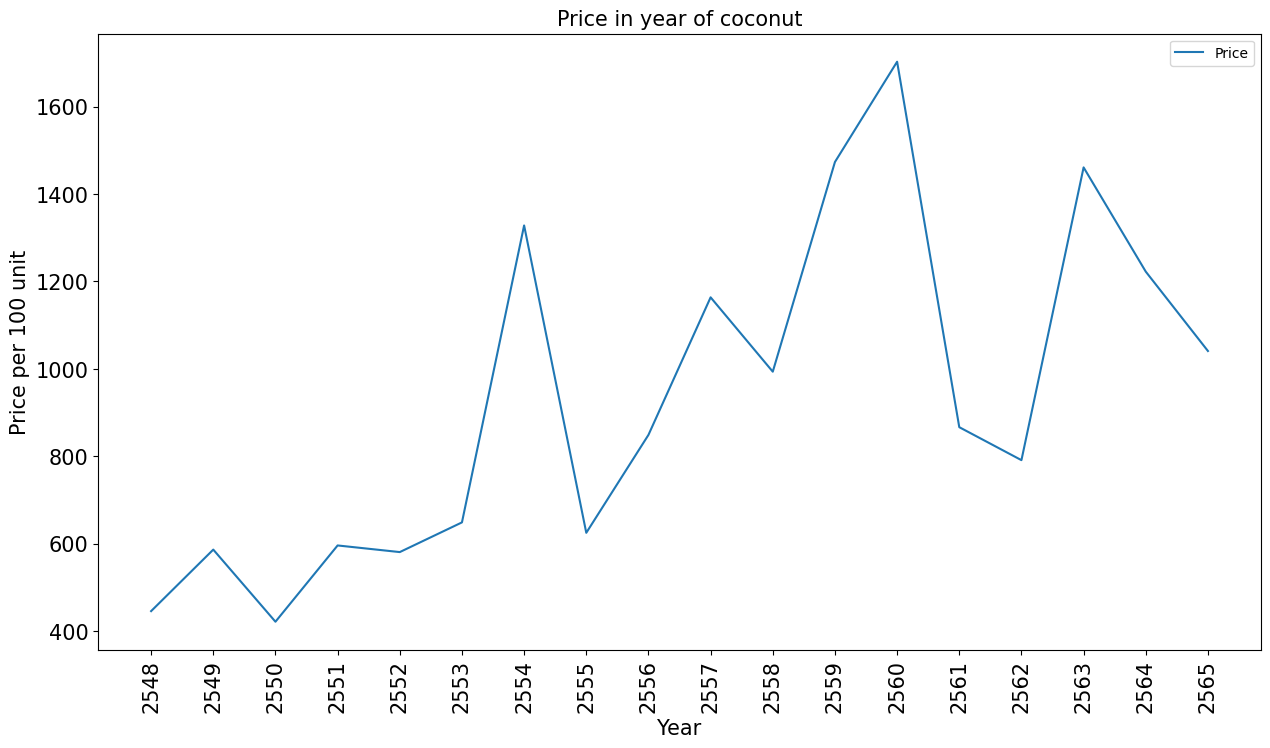

In [18]:
x=[str(x) for x in range(2548,2565+10)]
fig, axes = plt.subplots(figsize=(15,8))
axes.plot(x[0:len(price_coconut)],price_coconut['coconut(bath/100)'])
#axes.plot(x[17:],arima_coconut.predict())
axes.set_xticklabels(x,rotation=90)
axes.set_title('Price in year of coconut',size=15)
axes.set_ylabel('Price per 100 unit',size=15)
axes.set_xlabel('Year',size=15)
axes.legend(['Price','Prediction'])
for label in (axes.get_xticklabels() + axes.get_yticklabels()):
    label.set_fontsize(15)

In [19]:
Gr25=Groundnuts.describe()['Yield per harvested area (kg.)']['25%']
Co25=Coconut.describe()['Yield per harvested area (kg.)']['25%']
Pa25=Palm_oil.describe()['Yield per harvested area (kg.)']['25%']
So25=Soybean.describe()['Yield per harvested area (kg.)']['25%']
Su25=Sunflower.describe()['Yield per harvested area (kg.)']['25%']

Gr50=Groundnuts.describe()['Yield per harvested area (kg.)']['50%']
Co50=Coconut.describe()['Yield per harvested area (kg.)']['50%']
Pa50=Palm_oil.describe()['Yield per harvested area (kg.)']['50%']
So50=Soybean.describe()['Yield per harvested area (kg.)']['50%']
Su50=Sunflower.describe()['Yield per harvested area (kg.)']['50%']

Gr75=Groundnuts.describe()['Yield per harvested area (kg.)']['75%']
Co75=Coconut.describe()['Yield per harvested area (kg.)']['75%']
Pa75=Palm_oil.describe()['Yield per harvested area (kg.)']['75%']
So75=Soybean.describe()['Yield per harvested area (kg.)']['75%']
Su75=Sunflower.describe()['Yield per harvested area (kg.)']['75%']

Grstd=Groundnuts.describe()['Yield per harvested area (kg.)']['std']
Costd=Coconut.describe()['Yield per harvested area (kg.)']['std']
Pastd=Palm_oil.describe()['Yield per harvested area (kg.)']['std']
Sostd=Soybean.describe()['Yield per harvested area (kg.)']['std']
Sustd=Sunflower.describe()['Yield per harvested area (kg.)']['std']

Gr = Groundnuts[['province','Yield per harvested area (kg.)']]
Co = Coconut[['province','Yield per harvested area (kg.)']]
Pa = Palm_oil[['province','Yield per harvested area (kg.)']]
So = Soybean[['province','Yield per harvested area (kg.)']]
Su = Sunflower[['province','Yield per harvested area (kg.)']]

province = preview(bucket='bigdataprojectagri', key=f'row_data/ThepExcel-Thailand-Tambon.xlsx',sn='ProvinceDatabase')
province = province.sort_values(['ProvinceEng']).reset_index(drop=True)['ProvinceEng']
province = province.to_list()

p_Gr = Gr['province'].to_list()
p_Co = Co['province'].to_list()
p_Pa = Pa['province'].to_list()
p_So = So['province'].to_list()
p_Su = Su['province'].to_list()

y_Gr = {Gr['province'].iloc[i]:Gr['Yield per harvested area (kg.)'].iloc[i] for i in range(0,len(Gr))}
y_Co = {Co['province'].iloc[i]:Co['Yield per harvested area (kg.)'].iloc[i] for i in range(0,len(Co))}
y_Pa = {Pa['province'].iloc[i]:Pa['Yield per harvested area (kg.)'].iloc[i] for i in range(0,len(Pa))}
y_So = {So['province'].iloc[i]:So['Yield per harvested area (kg.)'].iloc[i] for i in range(0,len(So))}
y_Su = {Su['province'].iloc[i]:Su['Yield per harvested area (kg.)'].iloc[i] for i in range(0,len(Su))}

pr_So = []
pr_Pa = []
pr_Co = []
pr_Gr = []
pr_Su = []
for i in range(0,len(province)) :
    temp = [0,0,0,0,0]
    if province[i] in p_So :
        temp[0] = y_So[province[i]]
    if province[i] in p_Pa :
        temp[1] = y_Pa[province[i]]
    if province[i] in p_Co :
        temp[2] = y_Co[province[i]]
    if province[i] in p_Gr :
        temp[3] = y_Gr[province[i]]
    if province[i] in p_Su :
        temp[4] = y_Su[province[i]]
    pr_So.append(temp[0])
    pr_Pa.append(temp[1])
    pr_Co.append(temp[2])
    pr_Gr.append(temp[3])
    pr_Su.append(temp[4])
    
price_Agri = pd.DataFrame({
                    'Province' : province,
                    'Soybean' : pr_So,
                    'Palm' : pr_Pa,
                    'Coconut' : pr_Co,
                    'Groundnut' : pr_Gr,
                    'Sunflower' : pr_Su,
                })
price_Agri

,Province,Soybean,Palm,Coconut,Groundnut,Sunflower
0,Amnat Charoen,0,1236.92,0.00,0.000000,0.0
1,Ang Thong,0,0.00,0.00,0.000000,0.0
2,Bangkok,0,0.00,0.00,0.000000,0.0
3,Bueng Kan,0,2014.02,0.00,0.000000,0.0
4,Buri Ram,0,1665.90,0.00,192.701080,0.0
...,...,...,...,...,...,...
72,Udon Thani,0,1232.01,648.65,59.806543,0.0
73,Uthai Thani,0,1222.96,0.00,351.282051,0.0
74,Uttaradit,0,1108.04,0.00,0.000000,0.0
75,Yala,0,1981.02,698.13,0.000000,0.0


In [20]:
province = preview(bucket='bigdataprojectagri', key=f'row_data/ThepExcel-Thailand-Tambon.xlsx',sn='ProvinceDatabase')
provinceEng = province['ProvinceEng'].to_list()
province = province['ProvinceThai'].to_list()
map_Province = []
for i in range(len(province)) :
    map_Province.append([province[i],provinceEng[i]])
dict_Province = {provinceTH:ProvinceEng for provinceTH, ProvinceEng in map_Province}
dict_Province['อยุธยา'] = 'Phra Nakhon Si Ayutthaya'
dict_Province['ลําพูน'] = 'Lamphun'
dict_Province['ลําปาง'] = 'Lampang'
provinceEng.append('Phra Nakhon Si Ayutthaya')
provinceEng.append('Lamphun')
provinceEng.append('Lampang')

# Stat Model

In [21]:
Matrix = [[1,0,0,0],
          [0,1,0,0],
          [0,0,1,0],
          [0,0,0,1]]

order = ''
num = '123'
while True :
    check = True
    order = input("เรียงลำดับว่าคุณให้ความสำคัญกับอะไรมากที่สุดเรียงจากมากไปน้อย \n 1.ต้นทุนที่ต่ำ\n 2.ราคาขายที่สูง \n 3.ปริมาณผลผลิตที่มาก \n(กรอกแค่ตัวเลข) \n ตัวอย่าง : 2 3 1 (ชอบพืชที่ราคาขายสูงมากกว่าที่จะมีผลผลิตมากและต้นทุนที่ต่ำ)\n")
    for i in range(0,len(order)) :
        if i%2==0 and not (order[i] in num) :
            check = False
            break
        elif i%2==1 and not(order[i] == ' ') :
            check = False
            break
    if check :
        break

while True :
    pro = input("คุณอยู่จังหวัดอะไร : ")
    if pro in dict_Province :
        break
proEng = dict_Province[pro]
order = order.split(' ')
order = [int(i) for i in order]
Matrix[order[0]-1][order[1]-1] = 4
Matrix[order[0]-1][order[2]-1] = 6
Matrix[order[1]-1][order[2]-1] = 2
for i in range(0,len(Matrix[3])-1) :
    Matrix[3][order[i]-1] = (1+i)*2
for i in range(0,4) :
    for j in range(0,4) :
        if Matrix[i][j] == 0 :
            Matrix[i][j] = 1/Matrix[j][i]
Matrix = np.array(Matrix)
copy_m=[]
sumC = []
weight = []
for i in range(0,4) :
    sumC.append(sum(Matrix[:,i]))
for i in range(0,len(Matrix)) :
    copy_m.append([x/sumC[i] for x in Matrix[:,i]])
copy_m = np.array(copy_m).T
weight = [sum(copy_m[i,:])/4 for i in range(0,len(copy_m))]
Lamda = sum([sumC[i]*weight[i] for i in range(0,4)])
CI = (Lamda-4)/3
RI = 0.9
CR = CI/RI
print("===========================Stat Value===========================")
print("weight check = ",sum(weight)," (is 1) ")
print("Lamda Max = ",Lamda)
print("CI = ",CI)
print("RI = ",RI)
print("CR = ",CR)
if CR <0.1 :
    print('\n',CR , "< 0.1 corect!!" )

เรียงลำดับว่าคุณให้ความสำคัญกับอะไรมากที่สุดเรียงจากมากไปน้อย 
 1.ต้นทุนที่ต่ำ
 2.ราคาขายที่สูง 
 3.ปริมาณผลผลิตที่มาก 
(กรอกแค่ตัวเลข) 
 ตัวอย่าง : 2 3 1 (ชอบพืชที่ราคาขายสูงมากกว่าที่จะมีผลผลิตมากและต้นทุนที่ต่ำ)
2 3 1
คุณอยู่จังหวัดอะไร : ลพบุรี
===========================Stat Value===========================
weight check =  1.0  (is 1) 
Lamda Max =  4.104662703949694
CI =  0.03488756798323145
RI =  0.9
CR =  0.03876396442581272

 0.03876396442581272 < 0.1 corect!!


In [22]:
import pandas as pd
agri = ['Soybean','Palm','Coconut','Groundnut','Sunflower']
data = preview(bucket='bigdataprojectagri', key=f'row_data/fuzzy.xlsx')
infoSoy = data[data['Soybean']!=0]['Soybean'].describe()
infoPalm = data[data['Palm']!=0]['Palm'].describe()
infoCoc = data[data['Coconut']!=0]['Coconut'].describe()
infoGro = data[data['Groundnut']!=0]['Groundnut'].describe()
infoSun = data[data['Sunflower']!=0]['Sunflower'].describe()
info = [infoSoy,infoPalm,infoCoc,infoGro,infoSun]
for i in range(len(data)) :
    for j in range(1,6) :
        if data.iloc[i,j] < info[j-1]['50%']-info[j-1]['std'] and data.iloc[i,j] > 0 :
            data.iloc[i,j] = 1
        elif data.iloc[i,j] >= info[j-1]['50%']-info[j-1]['std'] and data.iloc[i,j] <= info[j-1]['50%']+info[j-1]['std'] :
            data.iloc[i,j] = 2
        elif data.iloc[i,j] > info[j-1]['50%']+info[j-1]['std'] :
            data.iloc[i,j] = 3
        else :
            data.iloc[i,j] = 0
newf = data.copy()
data['Soybean'] = data['Soybean']*weight[2]
data['Palm'] = data['Palm']*weight[2]
data['Coconut'] = data['Coconut']*weight[2]
data['Groundnut'] = data['Groundnut']*weight[2]
data['Sunflower'] = data['Sunflower']*weight[2]

standard = [[2,2,1],
            [3,1,1],
            [3,1,3],
            [1,3,2],
            [2,2,2]]
weight_agri = data.copy()
for i in range(0,len(weight_agri)) :
    for j in range(1,6) :
        if weight_agri.iloc[i,j]!= 0 :
            weight_agri.iloc[i,j] = weight_agri.iloc[i,j]+standard[j-1][0]*weight[0]+standard[j-1][1]*weight[1]+standard[j-1][2]*weight[3]
result = weight_agri[weight_agri['Province']==proEng].copy()
result = result.drop(['Province'],axis=1).reset_index(drop=True)
result = result.to_numpy()[0]
for i in range(0,5) :
    for j in range(0,4-i) :
        if result[j] < result[j+1] :
            agri[j],agri[j+1] = agri[j+1],agri[j]
            result[j],result[j+1] = result[j+1],result[j]
print("จังหวัด",pro,"ควรปลูก(ตามลำดับ)")
for i in range(0,5) :
    print(agri[i], ':',result[i])


จังหวัด ลพบุรี ควรปลูก(ตามลำดับ)
Groundnut : 2.279892467116891
Sunflower : 2.0
Palm : 1.2380681289650424
Soybean : 0.0
Coconut : 0.0


In [ ]:
plt.pie(result,labels = agri)
#จากกราฟจะแสดงว่าในจังหวัด (province) สามารถปลูก max(agri) ได้ดีที่สุดตามด้วย 
#print(agri[i] !=0) ซึ่งคุณสามารถแบ่งเป็นปลูก ถัวลิสงและ ปาล์ม ได้ตามสัดส่วนที่เราเสนอ

In [25]:
from io import StringIO
import boto3
def ex_to_s3(df,url) :
    bucket = 'bigdataprojectagri' # already created on S3
    csv_buffer = StringIO()
    df.to_csv(csv_buffer)
    s3_resource = boto3.resource('s3')
    s3_resource.Object(bucket, url).put(Body=csv_buffer.getvalue())

In [ ]:
ex_to_s3(food_product,'cleandata/GHG_Volumns/GHG_Volumns.csv')
ex_to_s3(Production_Indices,'cleandata/volumn_product/volumn_product.csv')
ex_to_s3(Groundnuts,'cleandata/Groundnuts/Groundnuts.csv')
ex_to_s3(Soybean,'cleandata/Soybean/Soybean.csv')
ex_to_s3(Coconut,'cleandata/Coconut/Coconut.csv')
ex_to_s3(Palm_oil,'cleandata/Palm_oil/Palm_oil.csv')
ex_to_s3(Sunflower,'cleandata/Sunflower/Sunflower.csv')

In [ ]:
# province = pd.DataFrame({
#                 'Thai':dict_Province.keys() ,
#                 'Englist':dict_Province.values()
#             })
# ex_to_s3(province,'cleandata/province/province.csv')

In [26]:
ex_to_s3(newf,'cleandata/fuzzy/fuzzy.csv')

In [23]:
newf

,Province,Soybean,Palm,Coconut,Groundnut,Sunflower
0,Amnat Charoen,0,2.0,0.0,2.0,0.0
1,Ang Thong,0,0.0,0.0,2.0,0.0
2,Bangkok,0,0.0,0.0,2.0,0.0
3,Bueng Kan,0,2.0,0.0,2.0,0.0
4,Buri Ram,0,2.0,0.0,2.0,0.0
...,...,...,...,...,...,...
72,Udon Thani,0,2.0,2.0,2.0,0.0
73,Uthai Thani,0,2.0,0.0,2.0,0.0
74,Uttaradit,0,2.0,0.0,2.0,0.0
75,Yala,0,2.0,2.0,2.0,0.0
